## Análisis demográfico préstamos personales

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('PP.csv')
df.head(20)

,Socio,Producto,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Limite_credito,Genero,ESTADO,...,dias_deudados_m2,dias_deudados_m1,dias_deudados_m0,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1
0,CYA,PP,208,609.26,609.26,609.26,0.066009,9230.0,F,DF,...,1,-8,25,72,0,0,0,0,0,0
1,CYA,PP,207,3097.38,1410.52,1410.52,1.548690,2000.0,M,EM,...,-120,-9,21,39,0,0,0,0,0,0
2,CYA,PP,188,4581.15,2101.25,2101.25,1.308900,3500.0,F,AGS,...,-3,-33,-63,71,0,0,0,0,0,0
3,CYA,PP,187,4371.61,4371.61,4371.61,0.738448,5920.0,F,NL,...,4,-26,13,44,0,0,0,0,0,0
4,CYA,PP,177,6468.53,3858.72,3858.72,1.437451,4500.0,F,CHI,...,-1,-26,4,59,0,0,0,0,0,0
5,CYA,PP,174,16476.64,6916.22,6916.22,1.299420,12680.0,F,EM,...,-30,-60,-90,44,0,0,0,0,0,0
6,CYA,PP,174,3338.11,2566.56,2566.56,1.669055,2000.0,F,PUE,...,-2,-31,2,47,0,0,0,0,0,0
7,CYA,PP,171,3767.91,1794.67,1794.67,0.489975,7690.0,M,NL,...,0,-30,-60,52,0,0,0,0,0,0
8,CYA,PP,174,8694.84,2944.82,2944.82,1.142555,7610.0,F,TAB,...,6,-29,4,37,0,0,0,0,0,0
9,CYA,PP,171,7245.10,7245.10,7245.10,1.932027,3750.0,F,DF,...,-120,-150,-180,52,0,0,0,0,0,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126115 entries, 0 to 126114
Data columns (total 61 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Socio                 126115 non-null  object 
 1   Producto              126115 non-null  object 
 2   Mob                   126115 non-null  int64  
 3   Saldo_total           126115 non-null  float64
 4   Saldo_Mes             126115 non-null  float64
 5   Pago_minimo_M0        126115 non-null  float64
 6   Utilizacion           126115 non-null  float64
 7   Limite_credito        126115 non-null  float64
 8   Genero                126011 non-null  object 
 9   ESTADO                126115 non-null  object 
 10  Saldo_total_M1        123000 non-null  float64
 11  Saldo_total_M2        111987 non-null  float64
 12  Saldo_total_M3        101141 non-null  float64
 13  Saldo_total_M4        90607 non-null   float64
 14  Saldo_total_M5        84130 non-null   float64
 15  

### Limpieza

In [3]:
# 2. Limpieza: filtrar registros con valores faltantes en género, edad y estado
df = df.dropna(subset=['Genero', 'Edad', 'ESTADO'])

In [4]:
# 3. Recodificación de variables demográficas
df['Genero'] = df['Genero'].str.strip().astype('category')

In [5]:
df['Estado'] = df['ESTADO'].str.strip().str.upper().astype('category')

### Definir variable cumplimiento de pago 

Nos ayuda a entender si los clientes han pagado o no durante los últimos meses

In [6]:
cols_cumplimiento = ['Variable_objetivo'] + [f'Variable_Objetivo_m{i}' for i in range(1,7)]
cols_cumplimiento

['Variable_objetivo',
 'Variable_Objetivo_m1',
 'Variable_Objetivo_m2',
 'Variable_Objetivo_m3',
 'Variable_Objetivo_m4',
 'Variable_Objetivo_m5',
 'Variable_Objetivo_m6']

In [7]:
# Suma de 1’s por cliente
df['TotalCumple'] = df[cols_cumplimiento].sum(axis=1)
# Proporción de meses cumplidos (entre 0 y 1)
df['PropCumple'] = df['TotalCumple'] / len(cols_cumplimiento)

##### Criterio mayoritario (cumple en al menos la mitad de los meses):

In [8]:
df['CumpleGeneral'] = df['PropCumple'].apply(
    lambda p: 'Cumple' if p >= 0.5 else 'No cumple'
)


In [9]:
df[['TotalCumple','PropCumple','CumpleGeneral']].head(20)

,TotalCumple,PropCumple,CumpleGeneral
0,1,0.142857,No cumple
1,1,0.142857,No cumple
2,0,0.000000,No cumple
3,0,0.000000,No cumple
4,1,0.142857,No cumple
5,0,0.000000,No cumple
6,1,0.142857,No cumple
7,0,0.000000,No cumple
8,0,0.000000,No cumple
9,0,0.000000,No cumple


In [10]:
print(df['CumpleGeneral'].value_counts(normalize=True))

CumpleGeneral
No cumple    0.995302
Cumple       0.004698
Name: proportion, dtype: float64


In [11]:
print("Tasa de cumplimiento promedio:", df['PropCumple'].mean())

Tasa de cumplimiento promedio: 0.04099188619587633


Los clientes no pagan!!!!

# Análisis por estados

## Gráfico de barras 

In [12]:
# 6. Visualizaciones: Top 5 y Bottom 5 estados por proporción de cumplimiento
# Calcular tasa promedio por estado
tasa_estado = df.groupby('Estado')['PropCumple'].mean()
# Top 5 estados con mayor cumplimiento
top5 = tasa_estado.sort_values(ascending=False).head(5)
# Top 5 estados con menor cumplimiento
bottom5 = tasa_estado.sort_values(ascending=True).head(5)

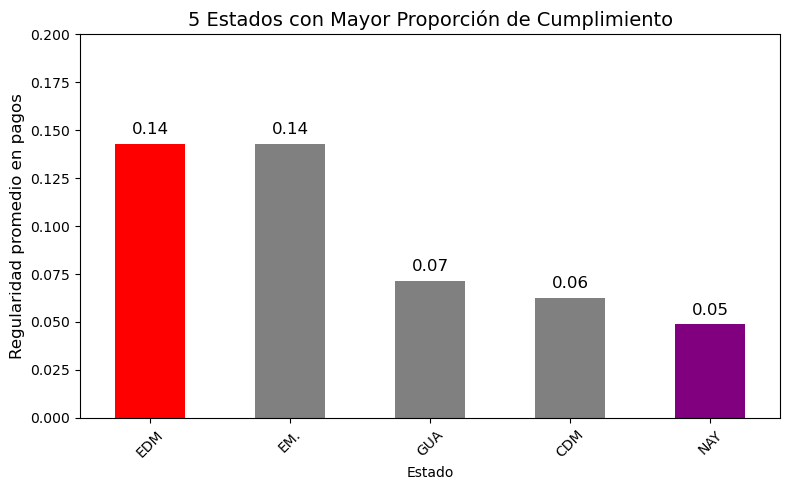

In [13]:


# Gráfico Top 5 estados cumplidores con colores personalizados
plt.figure(figsize=(8, 5))

# Definir colores personalizados
colores = ['red' if i == top5.idxmax() else 'purple' if i == top5.idxmin() else 'gray' for i in top5.index]

# Crear el gráfico de barras
top5.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('5 Estados con Mayor Proporción de Cumplimiento', fontsize=14)
plt.ylabel('Regularidad promedio en pagos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.20)  # Limitar el eje Y hasta 0.20
plt.tight_layout()

# Quitar líneas de fondo (ejes superior, derecho y líneas de cuadrícula)
plt.grid(False)  # Quita las líneas de cuadrícula

# Agregar los números de proporción sobre las barras
for i, v in enumerate(top5):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()


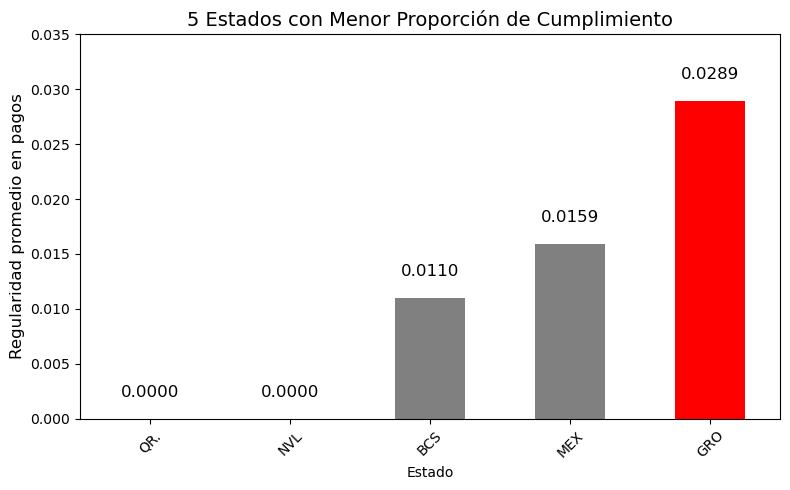

In [14]:
# Gráfico Bottom 5 estados incumplidores con colores personalizados
plt.figure(figsize=(8, 5))

# Definir colores personalizados
colores = ['red' if i == bottom5.idxmax() else 'purple' if i == bottom5.idxmin() else 'gray' for i in bottom5.index]

# Crear el gráfico de barras
bottom5.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('5 Estados con Menor Proporción de Cumplimiento', fontsize=14)
plt.ylabel('Regularidad promedio en pagos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.035)  # Limitar el eje Y hasta 0.050
plt.tight_layout()

# Quitar líneas de fondo (ejes superior, derecho y líneas de cuadrícula)
plt.grid(False)  # Quita las líneas de cuadrícula

# Agregar los números de proporción sobre las barras
for i, v in enumerate(bottom5):
    plt.text(i, v + 0.002, f'{v:.4f}', ha='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()


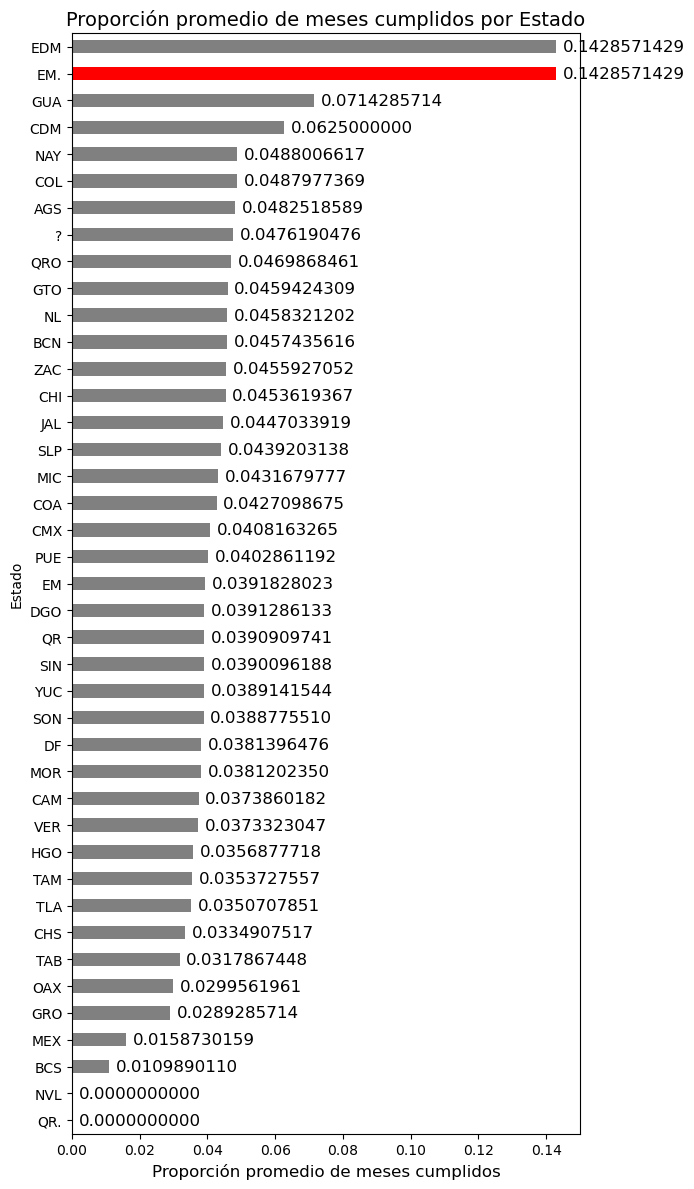

In [15]:


#Ordenar tasas por estado
tasa_sorted = tasa_estado.sort_values()

# Crear gráfico de barras horizontales
plt.figure(figsize=(6, 12))

# Definir colores personalizados
colores = ['red' if i == tasa_sorted.idxmax() else 'purple' if i == tasa_sorted.idxmin() else 'gray' for i in tasa_sorted.index]

# Crear el gráfico de barras horizontales
tasa_sorted.plot(kind='barh', color=colores)

# Título y etiquetas
plt.title('Proporción promedio de meses cumplidos por Estado', fontsize=14)
plt.xlabel('Proporción promedio de meses cumplidos', fontsize=12)
plt.tight_layout()

# Agregar los números de proporción a la derecha de las barras
for i, v in enumerate(tasa_sorted):
    plt.text(v + 0.002, i, f'{v:.10f}', ha='left', va='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()


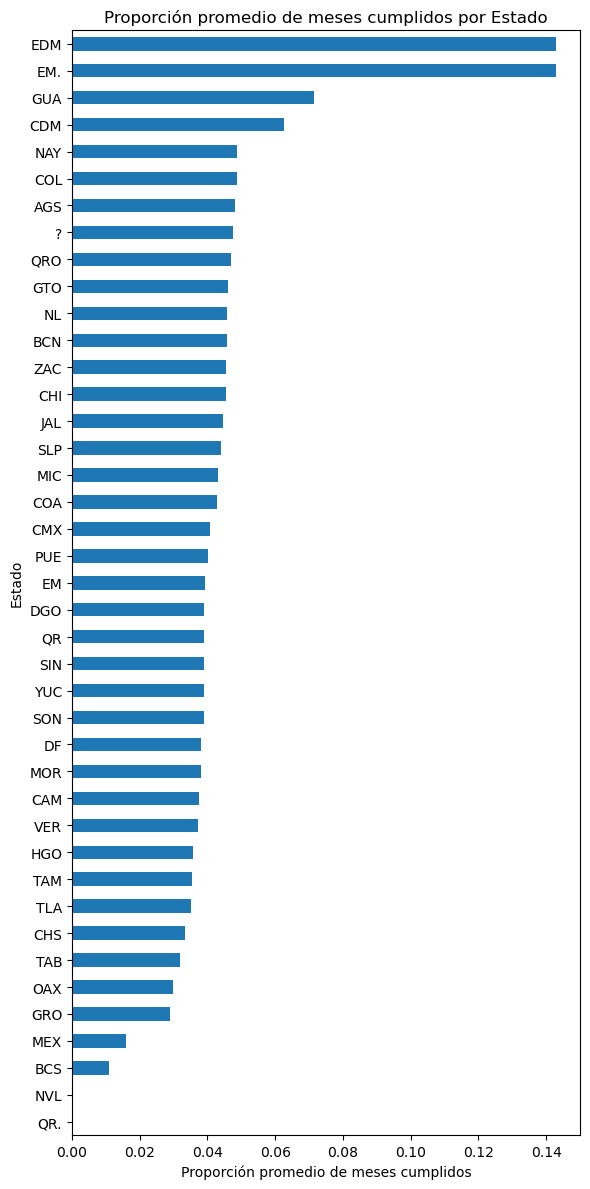

In [16]:
tasa_sorted = tasa_estado.sort_values()
plt.figure(figsize=(6,12))
tasa_sorted.plot(kind='barh')
plt.title('Proporción promedio de meses cumplidos por Estado')
plt.xlabel('Proporción promedio de meses cumplidos')
plt.tight_layout()
plt.show()

## Edad 

In [17]:
# Crear una columna con rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['RangoEdad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

# Verifica
print(df[['Edad', 'RangoEdad']].head())

   Edad RangoEdad
0    72       66+
1    39     36-45
2    71       66+
3    44     36-45
4    59     56-65


In [18]:
# Promedio de cumplimiento por rango de edad
cumplimiento_por_edad = df.groupby('RangoEdad')['PropCumple'].mean().reset_index()

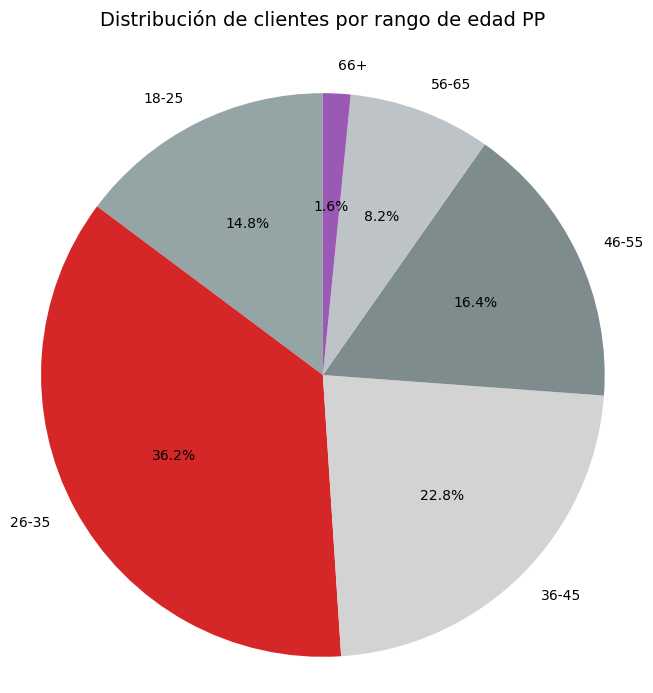

In [19]:
# Contar clientes por rango de edad
clientes_por_edad = df['RangoEdad'].value_counts().sort_index()

# Crear paleta personalizada con rojo, morado y grises
colores_personalizados = []

# Asignamos colores a cada grupo
for edad in clientes_por_edad.index:
    if edad == '26-35':
        colores_personalizados.append('#d62728')  # Rojo
    elif edad == '66+':
        colores_personalizados.append('#9b59b6')  # Morado
    elif edad == '18-25':
        colores_personalizados.append('#95a5a6')  # Morado
    elif edad == '56-65':
        colores_personalizados.append('#bdc3c7')  # Morado    
    elif edad == '46-55':
        colores_personalizados.append('#7f8c8d')  #    
        
    else:
        colores_personalizados.append('#d3d3d3')  # Gris claro

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clientes_por_edad, labels=clientes_por_edad.index, autopct='%1.1f%%', startangle=90, colors=colores_personalizados)
plt.title('Distribución de clientes por rango de edad PP', fontsize=14, pad=30)
plt.axis('equal')  # Mantiene el círculo perfecto
plt.show()


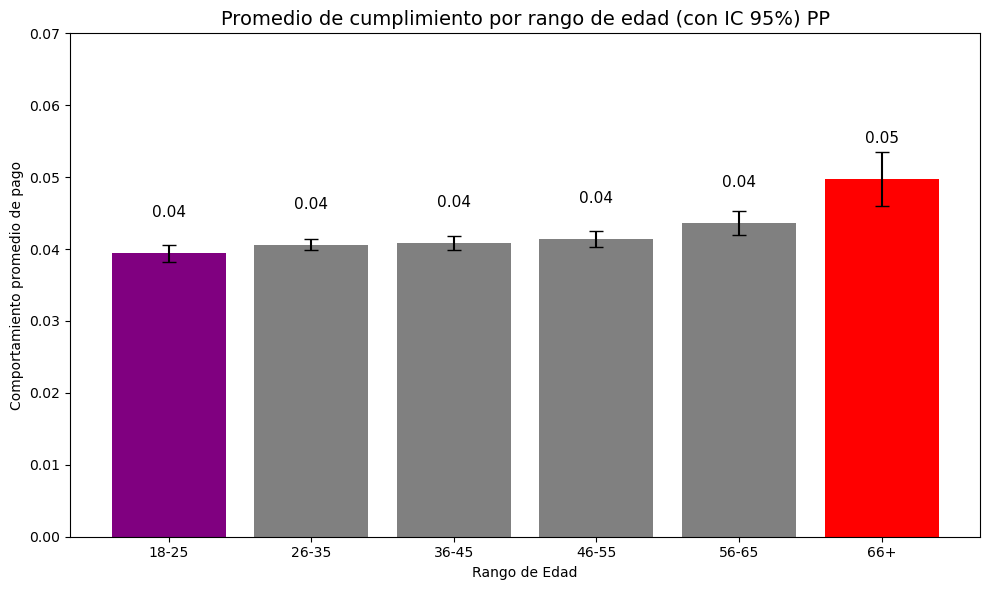

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, t

# Paso 1: Crear los rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['RangoEdad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

# Paso 2: Agrupar por rango de edad y calcular estadísticas
stats = df.groupby('RangoEdad').agg(
    promedio=('PropCumple', 'mean'),
    std=('PropCumple', 'std'),
    n=('PropCumple', 'count')
).reset_index()

# Paso 3: Calcular error estándar e intervalo de confianza
stats['sem'] = stats['std'] / np.sqrt(stats['n'])
confidence = 0.95
df_t = t.ppf((1 + confidence) / 2., stats['n'] - 1)
stats['ci95'] = stats['sem'] * df_t

# Paso 4: Asignar colores según cumplimiento
colores = []
max_val = stats['promedio'].max()
min_val = stats['promedio'].min()

for val in stats['promedio']:
    if val == max_val:
        colores.append('red')     # Más cumplidor
    elif val == min_val:
        colores.append('purple')  # Menos cumplidor
    else:
        colores.append('gray')    # Intermedios

# Paso 5: Visualización
plt.figure(figsize=(10,6))
bars = plt.bar(stats['RangoEdad'], stats['promedio'], color=colores, yerr=stats['ci95'], capsize=5)

# Etiquetas sobre las barras
for bar, val in zip(bars, stats['promedio']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.005, f'{val:.2f}', ha='center', fontsize=11, color='black')

# Ajustes finales
plt.title('Promedio de cumplimiento por rango de edad (con IC 95%) PP', fontsize=14)
plt.ylabel('Comportamiento promedio de pago')
plt.xlabel('Rango de Edad')
plt.ylim(0, 0.07)
plt.tight_layout()
plt.show()



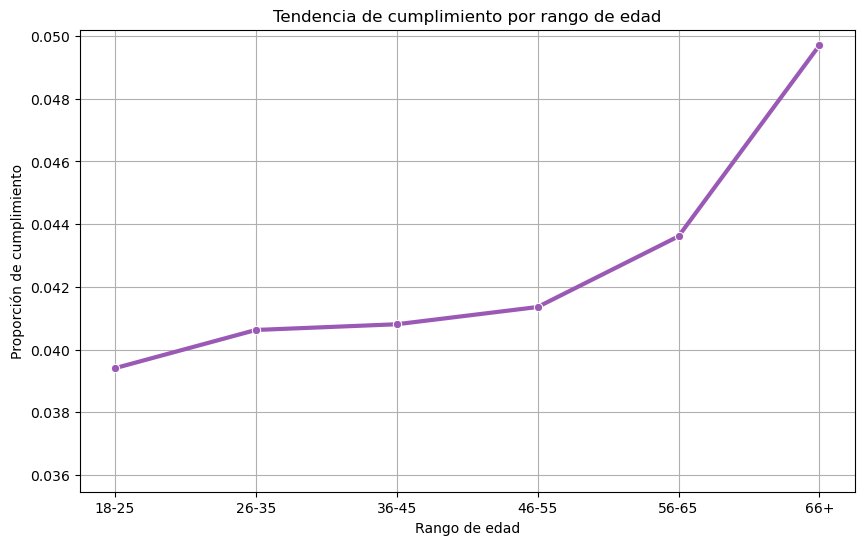

In [21]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumplimiento_por_edad, x='RangoEdad', y='PropCumple', marker='o', linewidth=3, color='#9b59b6')
plt.title('Tendencia de cumplimiento por rango de edad')
plt.ylabel('Proporción de cumplimiento')
plt.xlabel('Rango de edad')
plt.ylim(0.9 * cumplimiento_por_edad['PropCumple'].min(), 1.01 * cumplimiento_por_edad['PropCumple'].max())  # Zoom para hacer visibles diferencias
plt.grid(True)
plt.show()

In [22]:
# Calcular la cantidad de clientes por grupo de edad
cantidad_clientes_por_edad = df['RangoEdad'].value_counts()
cantidad_clientes_por_edad

RangoEdad
26-35    45674
36-45    28732
46-55    20695
18-25    18635
56-65    10289
66+       1986
Name: count, dtype: int64

# Género

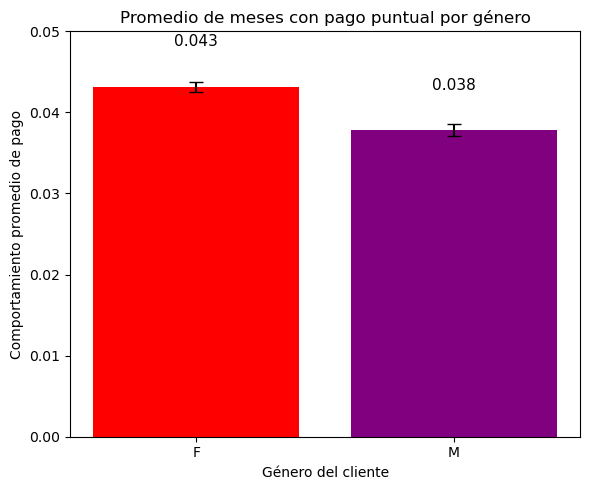

In [26]:
import seaborn as sns
from scipy.stats import t

# Agrupamos por género
stats_gen = df.groupby('Genero').agg(
    promedio=('PropCumple', 'mean'),
    std=('PropCumple', 'std'),
    n=('PropCumple', 'count')
).reset_index()

# Intervalo de confianza
stats_gen['sem'] = stats_gen['std'] / np.sqrt(stats_gen['n'])
confidence = 0.95
t_values = t.ppf((1 + confidence) / 2., stats_gen['n'] - 1)
stats_gen['ci95'] = stats_gen['sem'] * t_values

# Asignamos colores
colores = ['red' if val == stats_gen['promedio'].max() else 'purple' if val == stats_gen['promedio'].min() else 'gray' for val in stats_gen['promedio']]

# Graficamos
plt.figure(figsize=(6,5))
bars = plt.bar(stats_gen['Genero'], stats_gen['promedio'], color=colores, yerr=stats_gen['ci95'], capsize=5)

# Etiquetas
for bar, val in zip(bars, stats_gen['promedio']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.005, f'{val:.3f}', ha='center', fontsize=11)
plt.grid(False)
# Ejes
plt.ylim(0, 0.05)
plt.title('Promedio de meses con pago puntual por género')
plt.xlabel('Género del cliente')
plt.ylabel('Comportamiento promedio de pago')
plt.tight_layout()
plt.show()


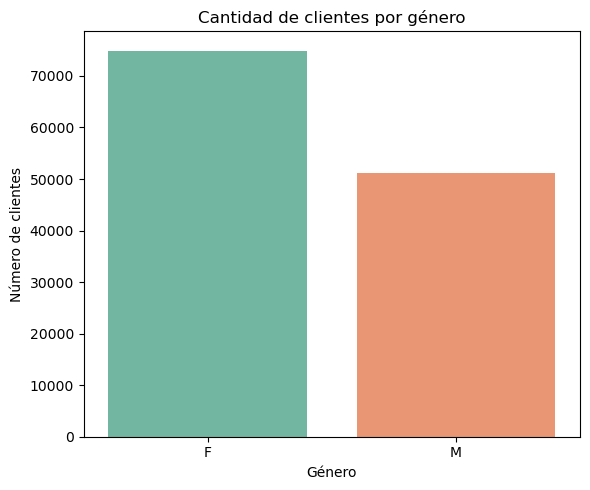

In [27]:
conteo_genero = df['Genero'].value_counts()
plt.figure(figsize=(6,5))
sns.barplot(x=conteo_genero.index, y=conteo_genero.values, palette='Set2')
plt.title('Cantidad de clientes por género')
plt.xlabel('Género')
plt.ylabel('Número de clientes')
plt.tight_layout()
plt.show()


# Análisis demográfico TDC Visa

In [29]:
data = pd.read_csv('TDC_Visa.csv')
data.head(20)

/var/folders/yh/qylzwjjs12d5bxtlbhpztnx80000gn/T/ipykernel_80415/3668745957.py:1: DtypeWarning: Columns (50,51,52) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('TDC_Visa.csv')


,Socio,Producto,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Limite_credito,Genero,ESTADO,...,dias_deudados_m2,dias_deudados_m1,dias_deudados_m0,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1
0,PRO,BK,58,358.37,358.37,179.83,0.089593,4000.0,M,NL,...,-120,-150,-180,54,0,0,0,0,0,0
1,PRO,BK,57,7783.63,7783.63,7783.63,3.796893,2050.0,F,EM,...,-63,-93,-123,38,0,0,0,0,0,0
2,PRO,BK,57,33857.28,33857.28,33857.28,2.051956,16500.0,F,NL,...,-120,-150,-180,26,0,0,0,0,0,0
3,PRO,BK,57,35563.16,35196.83,8002.23,2.155343,16500.0,M,EM,...,2,-1,-7,31,0,0,0,0,0,0
4,PRO,BK,57,19945.93,19945.93,2982.38,0.398919,50000.0,F,JAL,...,-2,0,-1,57,0,0,0,0,0,0
5,PRO,BK,57,2638.84,2051.59,1345.31,0.118546,22260.0,M,JAL,...,-120,-150,-180,44,0,0,0,0,0,0
6,PRO,BK,57,6120.46,6120.46,6120.46,1.768919,3460.0,M,EM,...,-58,-88,-118,49,0,0,0,0,0,0
7,PRO,BK,57,3834.12,3834.12,3834.12,3.485564,1100.0,F,EM,...,-60,-90,-120,30,0,0,0,0,0,0
8,PRO,BK,57,26445.13,26445.13,5334.85,1.100047,24040.0,M,NL,...,-1,-31,-61,55,0,0,0,0,0,0
9,PRO,BK,57,11162.98,10714.36,2981.45,1.262781,8840.0,F,JAL,...,-1,-30,-1,29,0,0,0,0,0,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 853999 entries, 0 to 853998
Data columns (total 68 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Socio                 853999 non-null  object 
 1   Producto              853999 non-null  object 
 2   Mob                   853999 non-null  int64  
 3   Saldo_total           853999 non-null  float64
 4   Saldo_Mes             853999 non-null  float64
 5   Pago_minimo_M0        853999 non-null  float64
 6   Utilizacion           853998 non-null  float64
 7   Limite_credito        853999 non-null  float64
 8   Genero                853334 non-null  object 
 9   ESTADO                853999 non-null  object 
 10  Behavior              465385 non-null  float64
 11  Saldo_total_M1        840779 non-null  float64
 12  Saldo_total_M2        782053 non-null  float64
 13  Saldo_total_M3        708433 non-null  float64
 14  Saldo_total_M4        623538 non-null  float64
 15  

### Limpieza

In [31]:
# 2. Limpieza: filtrar registros con valores faltantes en género, edad y estado
data = data.dropna(subset=['Genero', 'Edad', 'ESTADO'])

In [32]:
# 3. Recodificación de variables demográficas
data['Genero'] = data['Genero'].str.strip().astype('category')

In [33]:
data['Estado'] = data['ESTADO'].str.strip().str.upper().astype('category')

### Definir variable cumplimiento de pago 

Nos ayuda a entender si los clientes han pagado o no durante los últimos meses

In [34]:
cols_cumplimiento = ['Variable_objetivo'] + [f'Variable_Objetivo_m{i}' for i in range(1,7)]
cols_cumplimiento

['Variable_objetivo',
 'Variable_Objetivo_m1',
 'Variable_Objetivo_m2',
 'Variable_Objetivo_m3',
 'Variable_Objetivo_m4',
 'Variable_Objetivo_m5',
 'Variable_Objetivo_m6']

In [35]:
# Suma de 1’s por cliente
data['TotalCumple'] = data[cols_cumplimiento].sum(axis=1)
# Proporción de meses cumplidos (entre 0 y 1)
data['PropCumple'] = data['TotalCumple'] / len(cols_cumplimiento)

In [36]:
data['CumpleGeneral'] = df['PropCumple'].apply(
    lambda p: 'Cumple' if p >= 0.5 else 'No cumple'
)


In [37]:
data[['TotalCumple','PropCumple','CumpleGeneral']].head(20)

,TotalCumple,PropCumple,CumpleGeneral
0,0,0.000000,No cumple
1,0,0.000000,No cumple
2,0,0.000000,No cumple
3,1,0.142857,No cumple
4,1,0.142857,No cumple
5,0,0.000000,No cumple
6,0,0.000000,No cumple
7,0,0.000000,No cumple
8,0,0.000000,No cumple
9,1,0.142857,No cumple


In [38]:
print(data['CumpleGeneral'].value_counts(normalize=True))

CumpleGeneral
No cumple    0.995298
Cumple       0.004702
Name: proportion, dtype: float64


In [39]:
print("Tasa de cumplimiento promedio:", data['PropCumple'].mean())

Tasa de cumplimiento promedio: 0.04503227508639222


# Análisis por estados

In [40]:
# 6. Visualizaciones: Top 5 y Bottom 5 estados por proporción de cumplimiento
# Calcular tasa promedio por estado
tasa_estado = data.groupby('Estado')['PropCumple'].mean()
# Top 5 estados con mayor cumplimiento
top5 = tasa_estado.sort_values(ascending=False).head(5)
# Top 5 estados con menor cumplimiento
bottom5 = tasa_estado.sort_values(ascending=True).head(5)

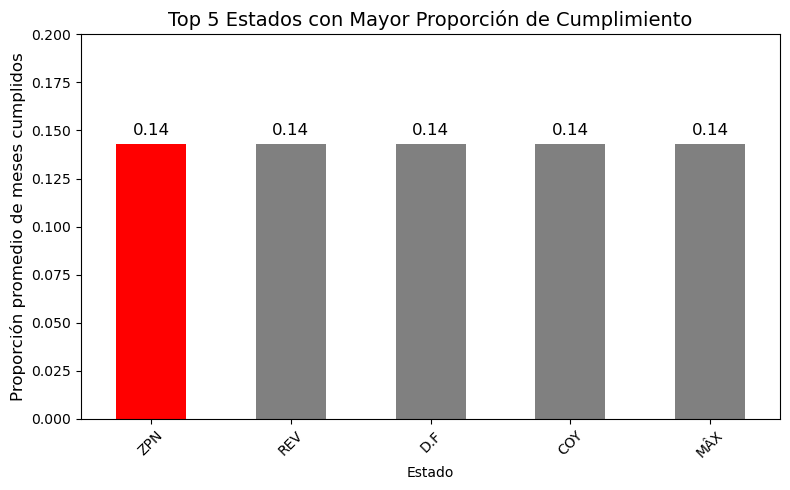

In [41]:


# Gráfico Top 5 estados cumplidores con colores personalizados
plt.figure(figsize=(8, 5))

# Definir colores personalizados
colores = ['red' if i == top5.idxmax() else 'purple' if i == top5.idxmin() else 'gray' for i in top5.index]

# Crear el gráfico de barras
top5.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('Top 5 Estados con Mayor Proporción de Cumplimiento', fontsize=14)
plt.ylabel('Proporción promedio de meses cumplidos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.20)  # Limitar el eje Y hasta 0.20
plt.tight_layout()

# Agregar los números de proporción sobre las barras
for i, v in enumerate(top5):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()


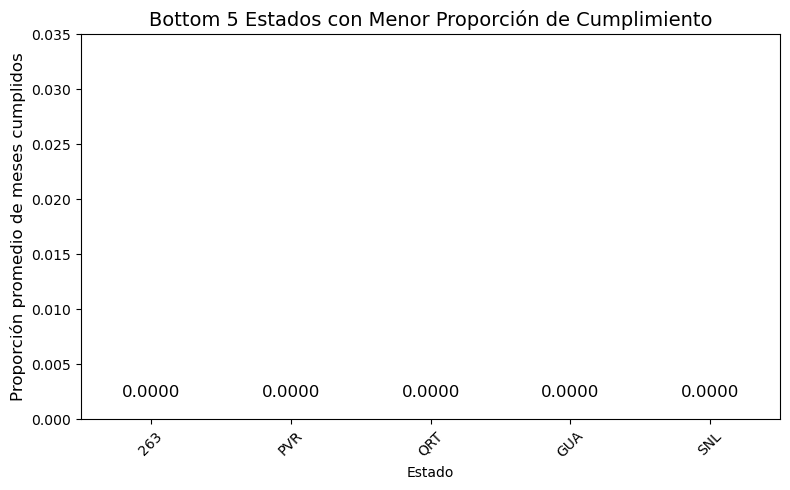

In [42]:
# Gráfico Bottom 5 estados incumplidores con colores personalizados
plt.figure(figsize=(8, 5))

# Definir colores personalizados
colores = ['red' if i == bottom5.idxmax() else 'purple' if i == bottom5.idxmin() else 'gray' for i in bottom5.index]

# Crear el gráfico de barras
bottom5.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('Bottom 5 Estados con Menor Proporción de Cumplimiento', fontsize=14)
plt.ylabel('Proporción promedio de meses cumplidos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.035)  # Limitar el eje Y hasta 0.050
plt.tight_layout()

# Agregar los números de proporción sobre las barras
for i, v in enumerate(bottom5):
    plt.text(i, v + 0.002, f'{v:.4f}', ha='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()

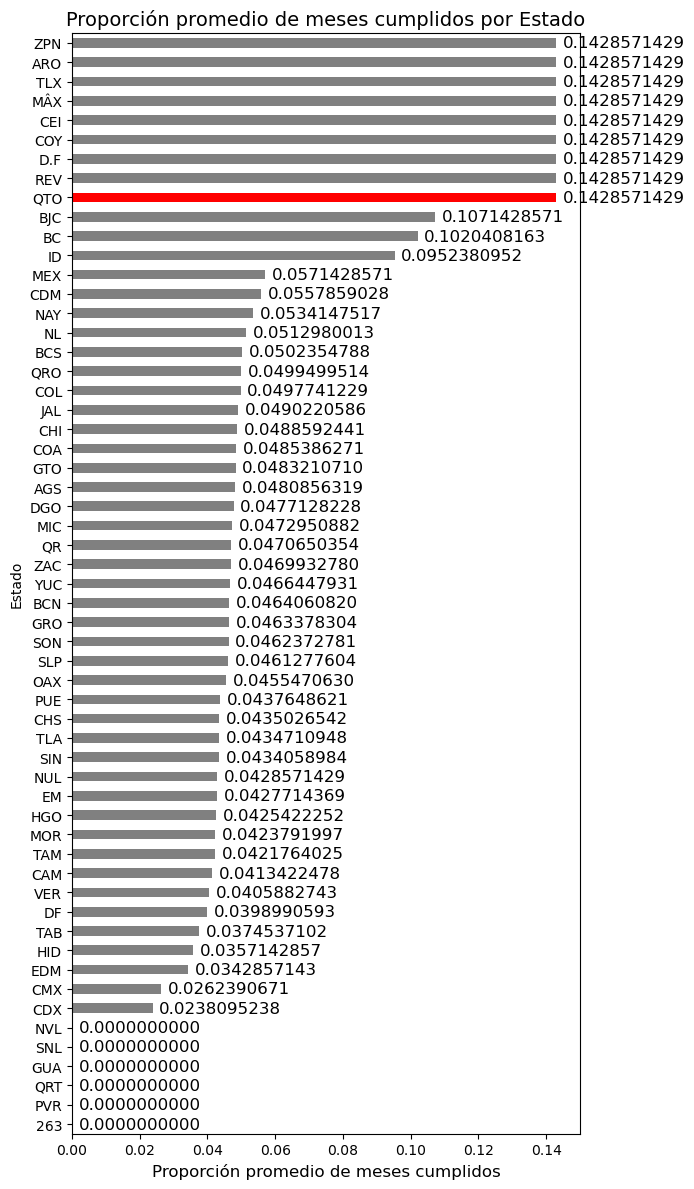

In [43]:
#Ordenar tasas por estado
tasa_sorted = tasa_estado.sort_values()

# Crear gráfico de barras horizontales
plt.figure(figsize=(6, 12))

# Definir colores personalizados
colores = ['red' if i == tasa_sorted.idxmax() else 'purple' if i == tasa_sorted.idxmin() else 'gray' for i in tasa_sorted.index]

# Crear el gráfico de barras horizontales
tasa_sorted.plot(kind='barh', color=colores)

# Título y etiquetas
plt.title('Proporción promedio de meses cumplidos por Estado', fontsize=14)
plt.xlabel('Proporción promedio de meses cumplidos', fontsize=12)
plt.tight_layout()

# Agregar los números de proporción a la derecha de las barras
for i, v in enumerate(tasa_sorted):
    plt.text(v + 0.002, i, f'{v:.10f}', ha='left', va='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()

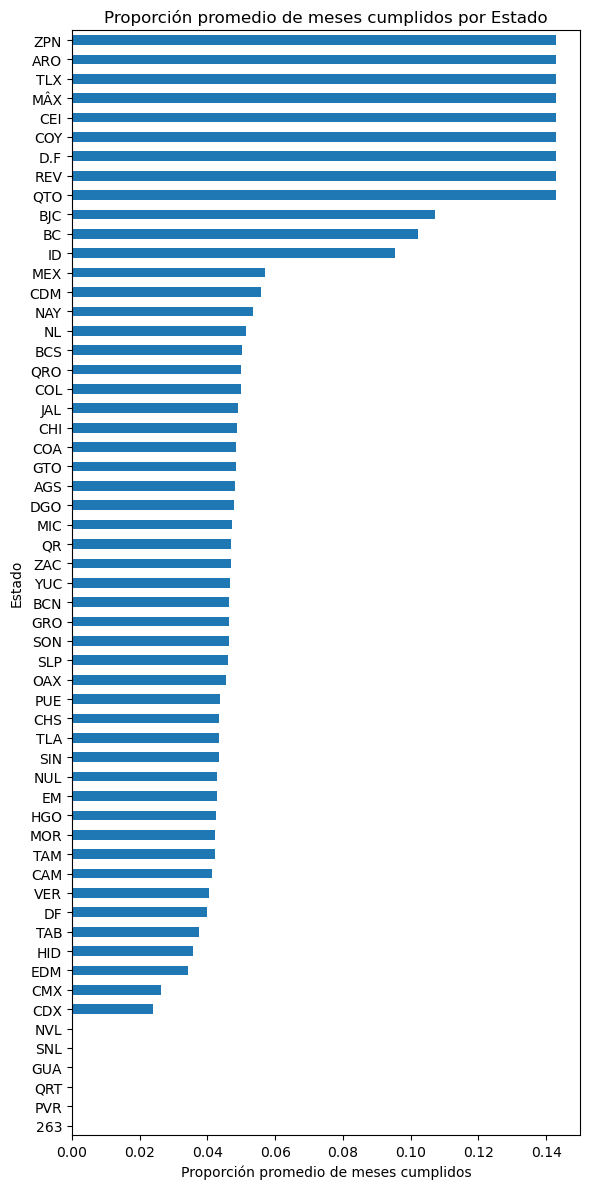

In [44]:
tasa_sorted = tasa_estado.sort_values()
plt.figure(figsize=(6,12))
tasa_sorted.plot(kind='barh')
plt.title('Proporción promedio de meses cumplidos por Estado')
plt.xlabel('Proporción promedio de meses cumplidos')
plt.tight_layout()
plt.show()

## Edad

In [45]:
# Crear una columna con rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
data['RangoEdad'] = pd.cut(data['Edad'], bins=bins, labels=labels, right=True)

# Verifica
print(data[['Edad', 'RangoEdad']].head())

   Edad RangoEdad
0    54     46-55
1    38     36-45
2    26     26-35
3    31     26-35
4    57     56-65


In [46]:
# Promedio de cumplimiento por rango de edad
cumplimiento_por_edad = data.groupby('RangoEdad')['PropCumple'].mean().reset_index()

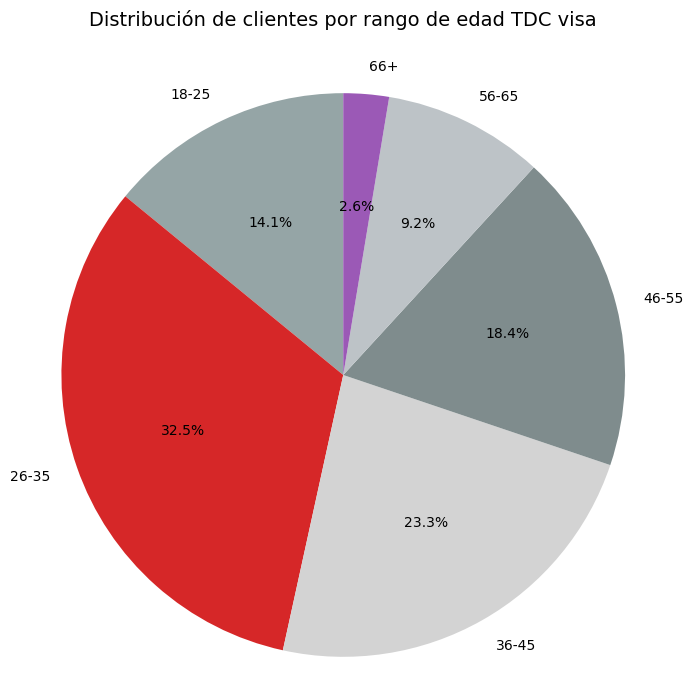

In [47]:
# Contar clientes por rango de edad
clientes_por_edad = data['RangoEdad'].value_counts().sort_index()

# Crear paleta personalizada con rojo, morado y grises
colores_personalizados = []

# Asignamos colores a cada grupo
for edad in clientes_por_edad.index:
    if edad == '26-35':
        colores_personalizados.append('#d62728')  # Rojo
    elif edad == '66+':
        colores_personalizados.append('#9b59b6')  # Morado
    elif edad == '18-25':
        colores_personalizados.append('#95a5a6')  # Morado
    elif edad == '56-65':
        colores_personalizados.append('#bdc3c7')  # Morado    
    elif edad == '46-55':
        colores_personalizados.append('#7f8c8d')  #    
        
    else:
        colores_personalizados.append('#d3d3d3')  # Gris claro

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clientes_por_edad, labels=clientes_por_edad.index, autopct='%1.1f%%', startangle=90, colors=colores_personalizados)
plt.title('Distribución de clientes por rango de edad TDC visa', fontsize=14, pad=30)
plt.axis('equal')  # Mantiene el círculo perfecto
plt.show()


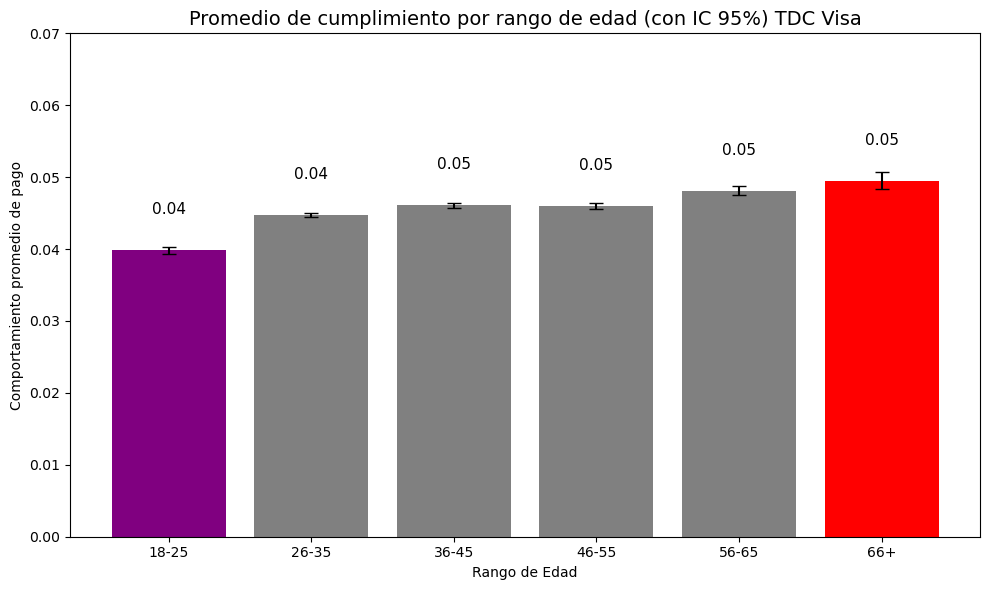

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import sem, t

# Paso 1: Crear los rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
data['RangoEdad'] = pd.cut(data['Edad'], bins=bins, labels=labels, right=True)

# Paso 2: Agrupar por rango de edad y calcular estadísticas
stats = data.groupby('RangoEdad').agg(
    promedio=('PropCumple', 'mean'),
    std=('PropCumple', 'std'),
    n=('PropCumple', 'count')
).reset_index()

# Paso 3: Calcular error estándar e intervalo de confianza
stats['sem'] = stats['std'] / np.sqrt(stats['n'])
confidence = 0.95
df_t = t.ppf((1 + confidence) / 2., stats['n'] - 1)
stats['ci95'] = stats['sem'] * df_t

# Paso 4: Asignar colores según cumplimiento
colores = []
max_val = stats['promedio'].max()
min_val = stats['promedio'].min()

for val in stats['promedio']:
    if val == max_val:
        colores.append('red')     # Más cumplidor
    elif val == min_val:
        colores.append('purple')  # Menos cumplidor
    else:
        colores.append('gray')    # Intermedios

# Paso 5: Visualización
plt.figure(figsize=(10,6))
bars = plt.bar(stats['RangoEdad'], stats['promedio'], color=colores, yerr=stats['ci95'], capsize=5)

# Etiquetas sobre las barras
for bar, val in zip(bars, stats['promedio']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.005, f'{val:.2f}', ha='center', fontsize=11, color='black')

# Ajustes finales
plt.title('Promedio de cumplimiento por rango de edad (con IC 95%) TDC Visa', fontsize=14)
plt.ylabel('Comportamiento promedio de pago')
plt.xlabel('Rango de Edad')
plt.ylim(0, 0.07)
plt.tight_layout()
plt.show()

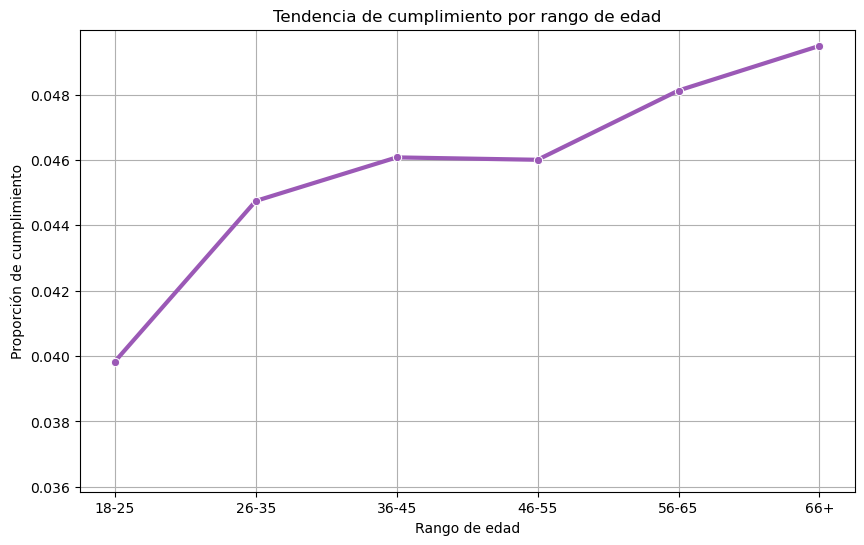

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumplimiento_por_edad, x='RangoEdad', y='PropCumple', marker='o', linewidth=3, color='#9b59b6')
plt.title('Tendencia de cumplimiento por rango de edad')
plt.ylabel('Proporción de cumplimiento')
plt.xlabel('Rango de edad')
plt.ylim(0.9 * cumplimiento_por_edad['PropCumple'].min(), 1.01 * cumplimiento_por_edad['PropCumple'].max())  # Zoom para hacer visibles diferencias
plt.grid(True)
plt.show()

In [50]:
# Calcular la cantidad de clientes por grupo de edad
cantidad_clientes_por_edad = df['RangoEdad'].value_counts()
cantidad_clientes_por_edad

RangoEdad
26-35    45674
36-45    28732
46-55    20695
18-25    18635
56-65    10289
66+       1986
Name: count, dtype: int64

## Género

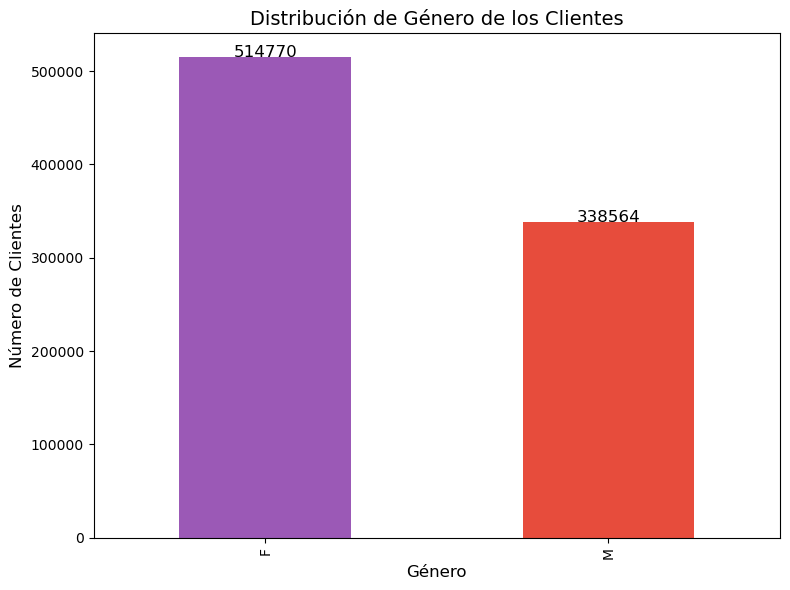

In [51]:
genero_counts = data['Genero'].value_counts()

# Colores morado y rojo más tenues
colores = ['#9b59b6', '#e74c3c']  # Morado y rojo tenues

# Gráfico de barras
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('Distribución de Género de los Clientes', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(genero_counts):
    plt.text(i, v + 0.5, f'{v}', ha='center', fontsize=12, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Análisis demográfico TDC Departamental

In [52]:
df = pd.read_csv('TDC_dept.csv')
df.head(20)

,Socio,Producto,Mob,Saldo_total,Saldo_Mes,Pago_minimo_M0,Utilizacion,Limite_credito,Genero,ESTADO,...,dias_deudados_m2,dias_deudados_m1,dias_deudados_m0,Edad,Variable_Objetivo_m6,Variable_Objetivo_m5,Variable_Objetivo_m4,Variable_Objetivo_m3,Variable_Objetivo_m2,Variable_Objetivo_m1
0,CYA,PLCC,199,1533.90,734.40,115.00,0.174307,8800.0,F,DGO,...,-47,-19,12,38,0,0,0,0,0,0
1,CYA,PLCC,191,913.02,747.02,194.00,0.332007,2750.0,M,NL,...,-2,-16,15,38,0,0,0,0,0,0
2,CYA,PLCC,191,4763.07,4763.07,883.00,1.107691,4300.0,M,MIC,...,21,-31,0,70,0,0,0,0,0,0
3,CYA,PLCC,196,2336.97,2336.97,495.00,0.265565,8800.0,M,EM,...,24,-29,4,37,0,0,0,0,0,0
4,CYA,PLCC,191,3769.18,2744.68,435.00,0.428316,8800.0,F,EM,...,1,-25,6,56,0,0,0,0,0,0
5,CYA,PLCC,190,1964.53,1337.81,222.00,0.223242,8800.0,F,COA,...,-42,-12,19,61,0,0,0,0,0,0
6,CYA,PLCC,190,5703.77,3942.12,553.00,0.769740,7410.0,F,DF,...,0,-31,2,35,0,0,0,0,0,0
7,CYA,PLCC,206,1105.08,705.08,181.00,1.004618,1100.0,F,GTO,...,-120,-11,20,40,0,0,0,0,0,0
8,CYA,PLCC,206,2102.46,2102.46,2102.46,1.911327,1100.0,F,GTO,...,-30,-60,-90,41,0,0,0,0,0,0
9,CYA,PLCC,190,7306.47,7306.47,1448.00,1.227978,5950.0,M,JAL,...,-120,-150,-180,37,0,0,0,0,0,0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309767 entries, 0 to 309766
Data columns (total 68 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Socio                 309767 non-null  object 
 1   Producto              309767 non-null  object 
 2   Mob                   309767 non-null  int64  
 3   Saldo_total           309767 non-null  float64
 4   Saldo_Mes             309767 non-null  float64
 5   Pago_minimo_M0        309767 non-null  float64
 6   Utilizacion           309767 non-null  float64
 7   Limite_credito        309767 non-null  float64
 8   Genero                309363 non-null  object 
 9   ESTADO                309766 non-null  object 
 10  Behavior              208980 non-null  float64
 11  Saldo_total_M1        305596 non-null  float64
 12  Saldo_total_M2        278980 non-null  float64
 13  Saldo_total_M3        254462 non-null  float64
 14  Saldo_total_M4        229838 non-null  float64
 15  

## Limpieza

In [54]:
# 2. Limpieza: filtrar registros con valores faltantes en género, edad y estado
df = df.dropna(subset=['Genero', 'Edad', 'ESTADO'])

In [55]:
# 3. Recodificación de variables demográficas
df['Genero'] = df['Genero'].str.strip().astype('category')

In [56]:
df['Estado'] = df['ESTADO'].str.strip().str.upper().astype('category')

### Definir variable cumplimiento de pago 

Nos ayuda a entender si los clientes han pagado o no durante los últimos meses

In [57]:
cols_cumplimiento = ['Variable_objetivo'] + [f'Variable_Objetivo_m{i}' for i in range(1,7)]
cols_cumplimiento

['Variable_objetivo',
 'Variable_Objetivo_m1',
 'Variable_Objetivo_m2',
 'Variable_Objetivo_m3',
 'Variable_Objetivo_m4',
 'Variable_Objetivo_m5',
 'Variable_Objetivo_m6']

In [58]:
# Suma de 1’s por cliente
df['TotalCumple'] = df[cols_cumplimiento].sum(axis=1)
# Proporción de meses cumplidos (entre 0 y 1)
df['PropCumple'] = df['TotalCumple'] / len(cols_cumplimiento)

In [59]:
df['CumpleGeneral'] = df['PropCumple'].apply(
    lambda p: 'Cumple' if p >= 0.5 else 'No cumple'
)


In [60]:
df[['TotalCumple','PropCumple','CumpleGeneral']].head(20)

,TotalCumple,PropCumple,CumpleGeneral
0,1,0.142857,No cumple
1,1,0.142857,No cumple
2,1,0.142857,No cumple
3,1,0.142857,No cumple
4,1,0.142857,No cumple
5,1,0.142857,No cumple
6,1,0.142857,No cumple
7,1,0.142857,No cumple
8,0,0.000000,No cumple
9,0,0.000000,No cumple


In [61]:
print(df['CumpleGeneral'].value_counts(normalize=True))

CumpleGeneral
No cumple    0.990435
Cumple       0.009565
Name: proportion, dtype: float64


In [62]:
print("Tasa de cumplimiento promedio:", df['PropCumple'].mean())

Tasa de cumplimiento promedio: 0.06712801553796892


## Análisis por estados

In [63]:
# 6. Visualizaciones: Top 5 y Bottom 5 estados por proporción de cumplimiento
# Calcular tasa promedio por estado
tasa_estado = df.groupby('Estado')['PropCumple'].mean()
# Top 5 estados con mayor cumplimiento
top5 = tasa_estado.sort_values(ascending=False).head(5)
# Top 5 estados con menor cumplimiento
bottom5 = tasa_estado.sort_values(ascending=True).head(5)

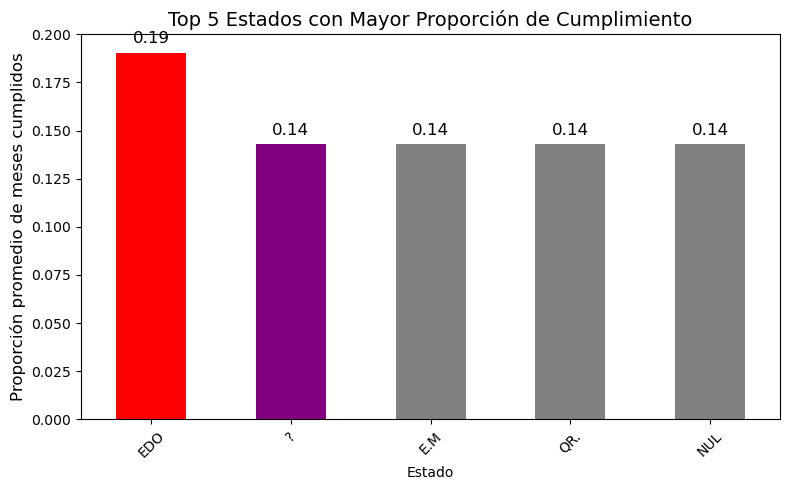

In [64]:
# Gráfico Top 5 estados cumplidores con colores personalizados
plt.figure(figsize=(8, 5))

# Definir colores personalizados
colores = ['red' if i == top5.idxmax() else 'purple' if i == top5.idxmin() else 'gray' for i in top5.index]

# Crear el gráfico de barras
top5.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('Top 5 Estados con Mayor Proporción de Cumplimiento', fontsize=14)
plt.ylabel('Proporción promedio de meses cumplidos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.20)  # Limitar el eje Y hasta 0.20
plt.tight_layout()

# Agregar los números de proporción sobre las barras
for i, v in enumerate(top5):
    plt.text(i, v + 0.005, f'{v:.2f}', ha='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()

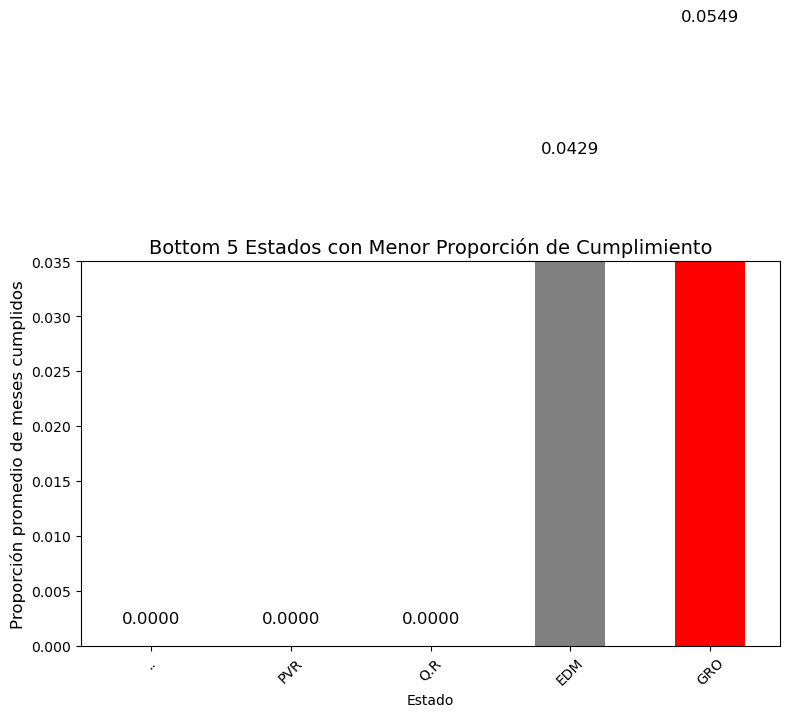

In [65]:
# Gráfico Bottom 5 estados incumplidores con colores personalizados
plt.figure(figsize=(8, 5))

# Definir colores personalizados
colores = ['red' if i == bottom5.idxmax() else 'purple' if i == bottom5.idxmin() else 'gray' for i in bottom5.index]

# Crear el gráfico de barras
bottom5.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('Bottom 5 Estados con Menor Proporción de Cumplimiento', fontsize=14)
plt.ylabel('Proporción promedio de meses cumplidos', fontsize=12)
plt.xticks(rotation=45)
plt.ylim(0, 0.035)  # Limitar el eje Y hasta 0.050
plt.tight_layout()

# Agregar los números de proporción sobre las barras
for i, v in enumerate(bottom5):
    plt.text(i, v + 0.002, f'{v:.4f}', ha='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()

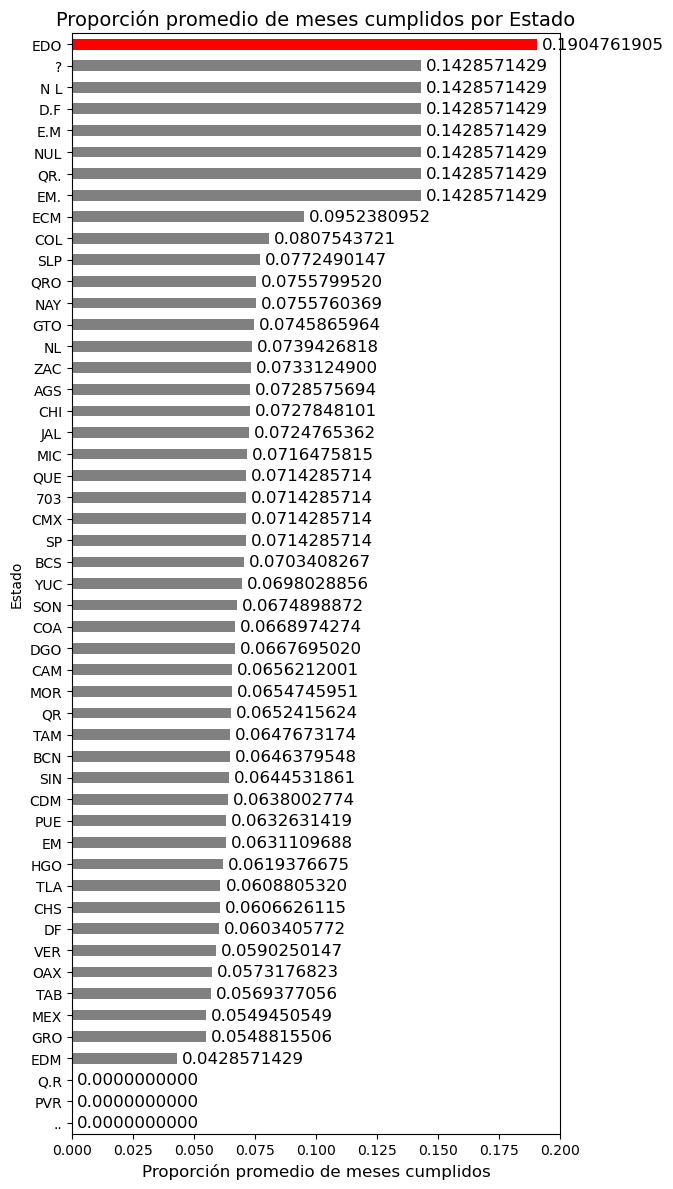

In [66]:
#Ordenar tasas por estado
tasa_sorted = tasa_estado.sort_values()

# Crear gráfico de barras horizontales
plt.figure(figsize=(6, 12))

# Definir colores personalizados
colores = ['red' if i == tasa_sorted.idxmax() else 'purple' if i == tasa_sorted.idxmin() else 'gray' for i in tasa_sorted.index]

# Crear el gráfico de barras horizontales
tasa_sorted.plot(kind='barh', color=colores)

# Título y etiquetas
plt.title('Proporción promedio de meses cumplidos por Estado', fontsize=14)
plt.xlabel('Proporción promedio de meses cumplidos', fontsize=12)
plt.tight_layout()

# Agregar los números de proporción a la derecha de las barras
for i, v in enumerate(tasa_sorted):
    plt.text(v + 0.002, i, f'{v:.10f}', ha='left', va='center', fontsize=12, color='black')

# Mostrar la gráfica
plt.show()


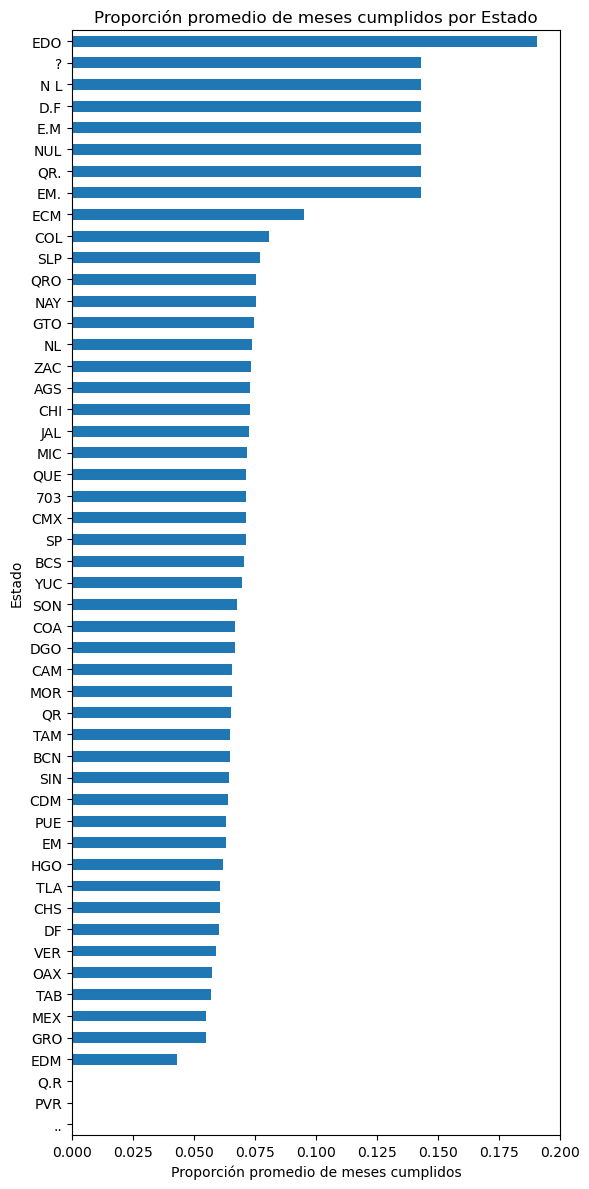

In [67]:
tasa_sorted = tasa_estado.sort_values()
plt.figure(figsize=(6,12))
tasa_sorted.plot(kind='barh')
plt.title('Proporción promedio de meses cumplidos por Estado')
plt.xlabel('Proporción promedio de meses cumplidos')
plt.tight_layout()
plt.show()

## Edad

In [68]:
# Crear una columna con rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['RangoEdad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

# Verifica
print(df[['Edad', 'RangoEdad']].head())

   Edad RangoEdad
0    38     36-45
1    38     36-45
2    70       66+
3    37     36-45
4    56     56-65


In [69]:
# Promedio de cumplimiento por rango de edad
cumplimiento_por_edad = df.groupby('RangoEdad')['PropCumple'].mean().reset_index()

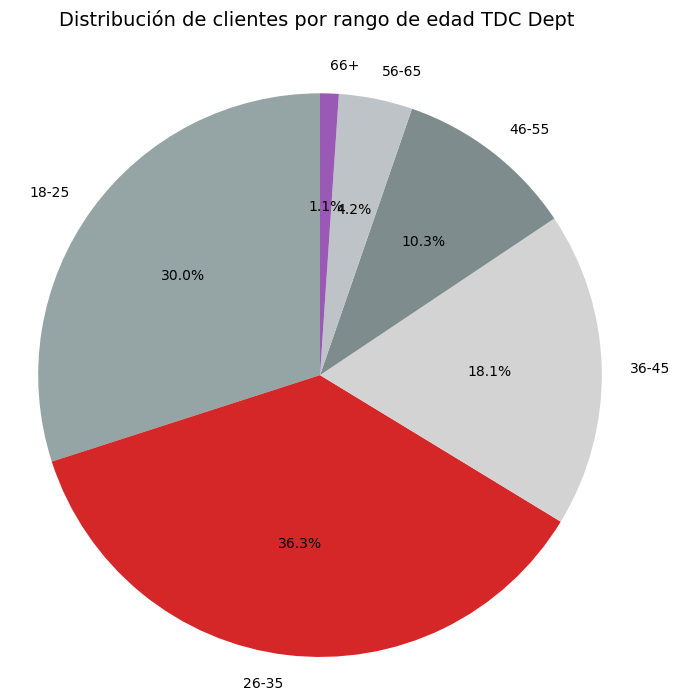

In [70]:
# Contar clientes por rango de edad
clientes_por_edad = df['RangoEdad'].value_counts().sort_index()

# Crear paleta personalizada con rojo, morado y grises
colores_personalizados = []

# Asignamos colores a cada grupo
for edad in clientes_por_edad.index:
    if edad == '26-35':
        colores_personalizados.append('#d62728')  # Rojo
    elif edad == '66+':
        colores_personalizados.append('#9b59b6')  # Morado
    elif edad == '18-25':
        colores_personalizados.append('#95a5a6')  # Morado
    elif edad == '56-65':
        colores_personalizados.append('#bdc3c7')  # Morado    
    elif edad == '46-55':
        colores_personalizados.append('#7f8c8d')  #    
        
    else:
        colores_personalizados.append('#d3d3d3')  # Gris claro

# Gráfico de pastel
plt.figure(figsize=(8, 8))
plt.pie(clientes_por_edad, labels=clientes_por_edad.index, autopct='%1.1f%%', startangle=90, colors=colores_personalizados)
plt.title('Distribución de clientes por rango de edad TDC Dept ', fontsize=14, pad=30)
plt.axis('equal')  # Mantiene el círculo perfecto
plt.show()


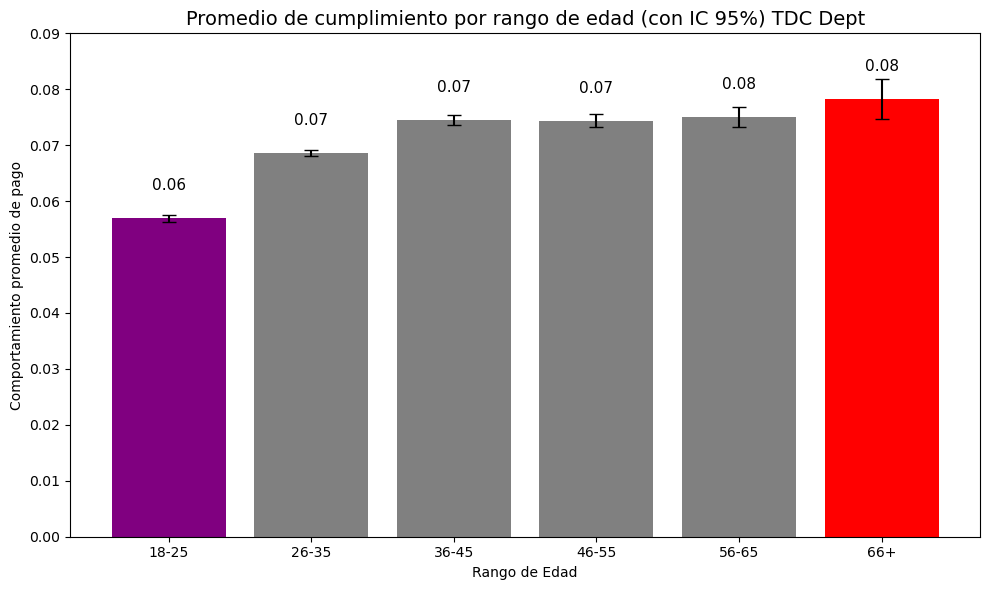

In [71]:
# Paso 1: Crear los rangos de edad
bins = [17, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']
df['RangoEdad'] = pd.cut(df['Edad'], bins=bins, labels=labels, right=True)

# Paso 2: Agrupar por rango de edad y calcular estadísticas
stats = df.groupby('RangoEdad').agg(
    promedio=('PropCumple', 'mean'),
    std=('PropCumple', 'std'),
    n=('PropCumple', 'count')
).reset_index()

# Paso 3: Calcular error estándar e intervalo de confianza
stats['sem'] = stats['std'] / np.sqrt(stats['n'])
confidence = 0.95
df_t = t.ppf((1 + confidence) / 2., stats['n'] - 1)
stats['ci95'] = stats['sem'] * df_t

# Paso 4: Asignar colores según cumplimiento
colores = []
max_val = stats['promedio'].max()
min_val = stats['promedio'].min()

for val in stats['promedio']:
    if val == max_val:
        colores.append('red')     # Más cumplidor
    elif val == min_val:
        colores.append('purple')  # Menos cumplidor
    else:
        colores.append('gray')    # Intermedios

# Paso 5: Visualización
plt.figure(figsize=(10,6))
bars = plt.bar(stats['RangoEdad'], stats['promedio'], color=colores, yerr=stats['ci95'], capsize=5)

# Etiquetas sobre las barras
for bar, val in zip(bars, stats['promedio']):
    plt.text(bar.get_x() + bar.get_width()/2, val + 0.005, f'{val:.2f}', ha='center', fontsize=11, color='black')

# Ajustes finales
plt.title('Promedio de cumplimiento por rango de edad (con IC 95%) TDC Dept', fontsize=14)
plt.ylabel('Comportamiento promedio de pago')
plt.xlabel('Rango de Edad')
plt.ylim(0, 0.09)
plt.tight_layout()
plt.show()

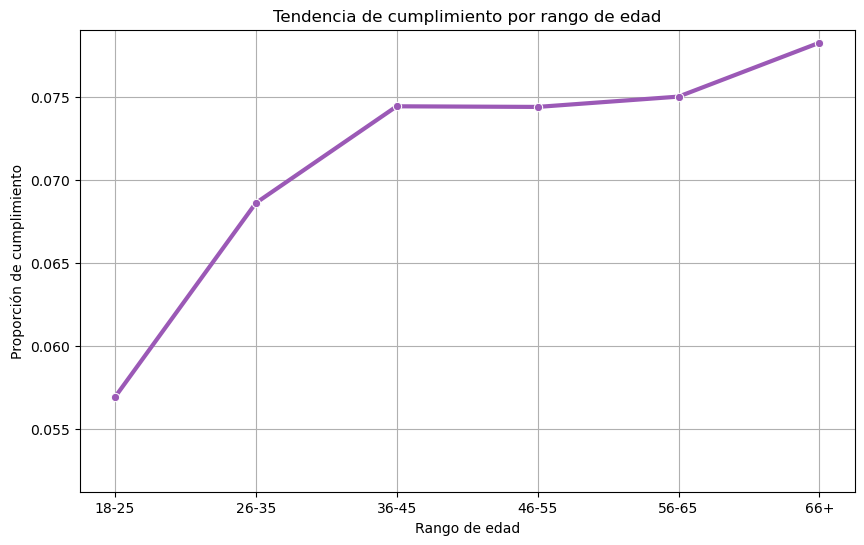

In [72]:
plt.figure(figsize=(10,6))
sns.lineplot(data=cumplimiento_por_edad, x='RangoEdad', y='PropCumple', marker='o', linewidth=3, color='#9b59b6')
plt.title('Tendencia de cumplimiento por rango de edad')
plt.ylabel('Proporción de cumplimiento')
plt.xlabel('Rango de edad')
plt.ylim(0.9 * cumplimiento_por_edad['PropCumple'].min(), 1.01 * cumplimiento_por_edad['PropCumple'].max())  # Zoom para hacer visibles diferencias
plt.grid(True)
plt.show()

In [73]:
# Calcular la cantidad de clientes por grupo de edad
cantidad_clientes_por_edad = df['RangoEdad'].value_counts()
cantidad_clientes_por_edad

RangoEdad
26-35    112405
18-25     92696
36-45     55936
46-55     31948
56-65     13075
66+        3302
Name: count, dtype: int64

## Género

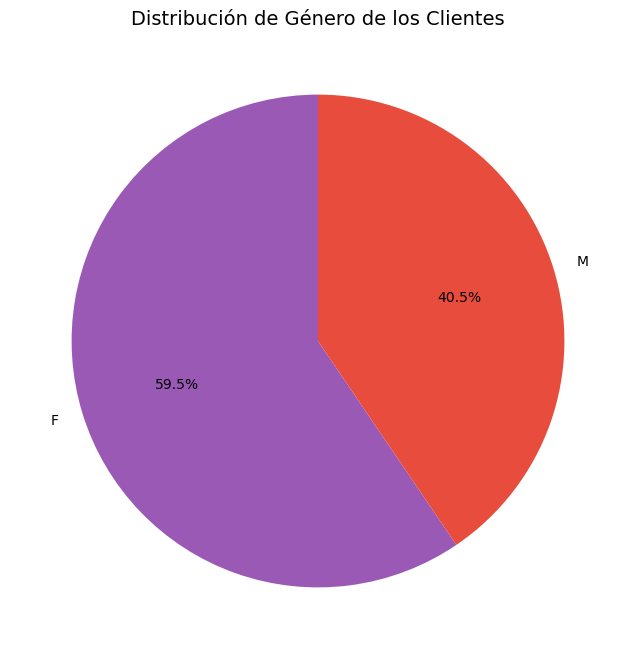

In [74]:
genero_counts = df['Genero'].value_counts()

# Colores personalizados (más tenues)
colores = ['#9b59b6', '#e74c3c']  # Morado y rojo tenues

# Gráfico de pastel
plt.figure(figsize=(8, 8))
genero_counts.plot(kind='pie', autopct='%1.1f%%', colors=colores, startangle=90, wedgeprops={'edgecolor': 'none'})
plt.title('Distribución de Género de los Clientes', fontsize=14)
plt.ylabel('')  # Sin etiqueta en el eje Y
plt.show()

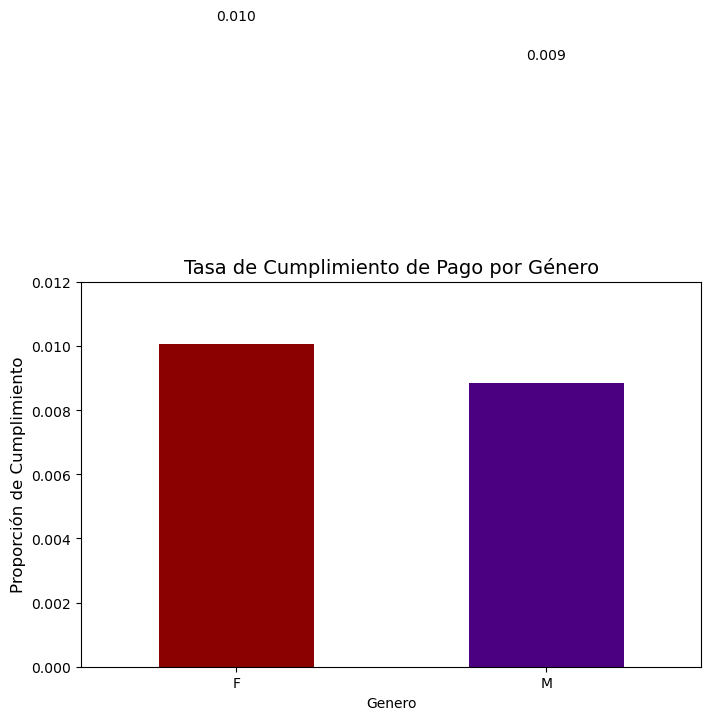

In [75]:
# Calcular la tasa de cumplimiento por género
cumplimiento_por_genero = df.groupby('Genero')['CumpleGeneral'].value_counts(normalize=True).unstack().fillna(0)

# Generar el gráfico de barras
plt.figure(figsize=(8, 5))
barplot = cumplimiento_por_genero['Cumple'].plot(kind='bar', color='teal')

# Asignar colores personalizados a las barras (roja para la barra más baja, morada para la más alta)
max_value = cumplimiento_por_genero['Cumple'].max()
min_value = cumplimiento_por_genero['Cumple'].min()

for i, bar in enumerate(barplot.patches):
    value = cumplimiento_por_genero['Cumple'].iloc[i]
    if value == max_value:
        bar.set_facecolor('darkred')  # Barra más alta en rojo
    elif value == min_value:
        bar.set_facecolor('indigo')  # Barra más baja en morado
    else:
        bar.set_facecolor('lightgray')  # Otras barras en gris

    # Añadir los valores sobre las barras
    height = bar.get_height()
    bar.set_height(height)
    plt.text(bar.get_x() + bar.get_width() / 2, height + 0.01, f'{height:.3f}', ha='center', va='bottom')

# Título y etiquetas
plt.title('Tasa de Cumplimiento de Pago por Género', fontsize=14)
plt.ylabel('Proporción de Cumplimiento', fontsize=12)
plt.xticks(rotation=0)

# Establecer el límite del eje Y
plt.ylim(0, 0.012)  # Limitar el eje Y hasta 0.007

plt.show()



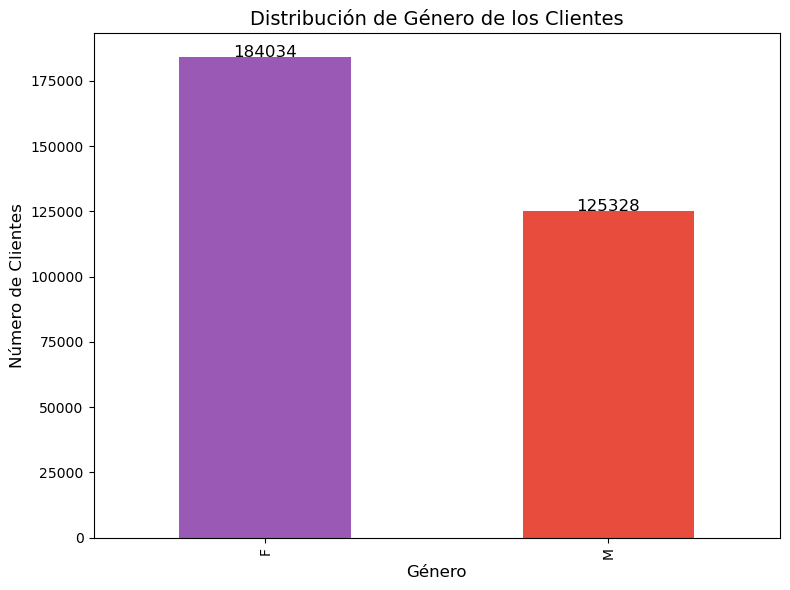

In [76]:
# Colores morado y rojo más tenues
colores = ['#9b59b6', '#e74c3c']  # Morado y rojo tenues

# Gráfico de barras
plt.figure(figsize=(8, 6))
genero_counts.plot(kind='bar', color=colores)

# Título y etiquetas
plt.title('Distribución de Género de los Clientes', fontsize=14)
plt.xlabel('Género', fontsize=12)
plt.ylabel('Número de Clientes', fontsize=12)

# Etiquetas sobre las barras
for i, v in enumerate(genero_counts):
    plt.text(i, v + 0.5, f'{v}', ha='center', fontsize=12, color='black')

# Mostrar el gráfico
plt.tight_layout()
plt.show()